In [1]:
import pandas as pd
from sklearn.linear_model import BayesianRidge
from pickle import *

In [2]:
data=pd.read_csv("yield_df.csv")
print(data)

       Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                               1485             121.00     16.37  
1                               1485             121.00     16.37  
2  

In [3]:
features=data[[ "Year","average_rain_fall_mm_per_year","pesticides_tonnes","avg_temp"]]
target=data["hg/ha_yield"]

In [4]:
model=BayesianRidge()
model.fit(features.values,target)

BayesianRidge()

In [5]:
f=open("re.pkl","wb")
dump(model,f)
f.close()
print("model created")

model created


In [6]:
from pickle import *
import os

In [ ]:
import os
from joblib import load

fn = "re.pkl"

if os.path.exists(fn):
    with open(fn, "rb") as f:
        model = load(f)
    print("Model loaded")
else:
    print(fn, "does not exist")
    # Handle the case where the model file does not exist

year = int(input("Enter year: "))
avg_rainfall = int(input("Enter average rainfall per mm: "))
Pest = int(input("Enter Pesticides_tonnes: "))
avg_temp = float(input("Enter average temperature: "))

# Make prediction
yield_prediction = model.predict([[year, avg_rainfall, Pest, avg_temp]])
print("Predicted yield:", yield_prediction)


In [7]:
import numpy as np
import tensorflow as tf
import os
from joblib import load

# Define a function to create and compile the TensorFlow model
def create_tf_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Load the model from file
fn = "re.pkl"

if os.path.exists(fn):
    with open(fn, "rb") as f:
        model_bayesian = load(f)
    print("Bayesian Linear Regression model loaded")
else:
    print(fn, "does not exist")
    # Handle the case where the model file does not exist

# Take input from user
year = int(input("Enter year: "))
avg_rainfall = int(input("Enter average rainfall per mm: "))
Pest = int(input("Enter Pesticides_tonnes: "))
avg_temp = float(input("Enter average temperature: "))

# Prepare input features for TensorFlow model
X_tf = np.array([[year, avg_rainfall, Pest, avg_temp]])

# Create and fit the TensorFlow model
tf_model = create_tf_model(input_shape=X_tf.shape[1])
tf_model.fit(X_tf, model_bayesian.predict(X_tf), epochs=100, verbose=0)

# Make prediction using the TensorFlow model
yield_prediction_tf = tf_model.predict(X_tf)
print("Predicted yield using TensorFlow model:", yield_prediction_tf)



Bayesian Linear Regression model loaded
Enter year: 2022
Enter average rainfall per mm: 1450
Enter Pesticides_tonnes: 110
Enter average temperature: 23



1/1 [==============================] - 0s 98ms/step
Predicted yield using TensorFlow model: [[731.89154]]


In [8]:
import os
from joblib import load
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Bayesian Linear Regression model
class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # prior precision
        self.beta = beta    # noise precision
        self.w_mean = None  # posterior mean
        self.w_cov = None   # posterior covariance

    def fit(self, X, y):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Compute posterior covariance matrix
        self.w_cov = np.linalg.inv(self.alpha * np.eye(X.shape[1]) + self.beta * X.T @ X)
        
        # Compute posterior mean
        self.w_mean = self.beta * self.w_cov @ X.T @ y

    def predict(self, X):
        # Add intercept term to X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Predict using posterior mean
        return X @ self.w_mean

#model
model=BayesianLinearRegression()
model.fit(features.values,target)

f=open("aa.pkl","wb")
dump(model,f)
f.close()
print("model created")

# Load Bayesian Linear Regression model from file
fn_bayesian = "aa.pkl"

if os.path.exists(fn_bayesian):
    with open(fn_bayesian, "rb") as f:
        model_bayesian = load(f)
    print("Bayesian Linear Regression Model loaded")
else:
    print(fn_bayesian, "does not exist")
    # Handle the case where the model file does not exist

# Load another model from file
fn_another_model = "re.pkl"

if os.path.exists(fn_another_model):
    with open(fn_another_model, "rb") as f:
        model_another = load(f)
    print("Another Model loaded")
else:
    print(fn_another_model, "does not exist")
    # Handle the case where the model file does not exist

# Take input from user
year = int(input("Enter year: "))
avg_rainfall = int(input("Enter average rainfall per mm: "))
Pest = int(input("Enter Pesticides_tonnes: "))
avg_temp = float(input("Enter average temperature: "))

# Make prediction using Bayesian Linear Regression model
yield_prediction_bayesian = model_bayesian.predict(np.array([[year, avg_rainfall, Pest, avg_temp]]))
print("Predicted yield (Bayesian Linear Regression Model):", yield_prediction_bayesian)

# Make prediction using another model
yield_prediction_another = model_another.predict([[year, avg_rainfall, Pest, avg_temp]])
print("Predicted yield (Another Model):", yield_prediction_another)

# Calculate MAE and MSE for Bayesian Linear Regression model
mae_bayesian = mean_absolute_error(yield_prediction_bayesian, yield_prediction_another)
mse_bayesian = mean_squared_error(yield_prediction_bayesian, yield_prediction_another)

# Print comparison results
print("\nComparison of Predicted Yield:")
print("Bayesian Linear Regression Model Prediction:", yield_prediction_bayesian)
print("Another Model Prediction:", yield_prediction_another)
print("\nAccuracy Metrics:")
print("Mean Absolute Error (MAE) for Bayesian Linear Regression Model:", mae_bayesian)
print("Mean Squared Error (MSE) for Bayesian Linear Regression Model:", mse_bayesian)


model created
Bayesian Linear Regression Model loaded
Another Model loaded
Enter year: 2022
Enter average rainfall per mm: 1450
Enter Pesticides_tonnes: 110
Enter average temperature: 23
Predicted yield (Bayesian Linear Regression Model): [77107.75875173]
Predicted yield (Another Model): [73716.45486785]

Comparison of Predicted Yield:
Bayesian Linear Regression Model Prediction: [77107.75875173]
Another Model Prediction: [73716.45486785]

Accuracy Metrics:
Mean Absolute Error (MAE) for Bayesian Linear Regression Model: 3391.3038838806533
Mean Squared Error (MSE) for Bayesian Linear Regression Model: 11500942.032824004


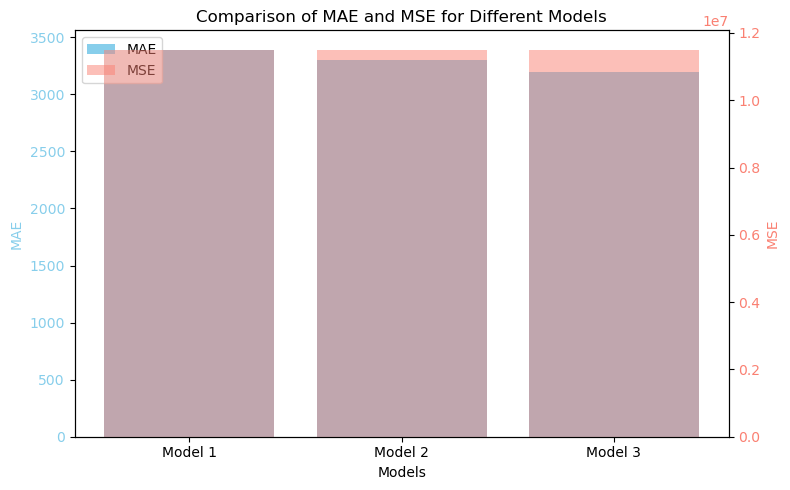

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sample MAE and MSE values
mae_values = [3391.303, 3300.0, 3200.0]  # Example values, replace with actual values
mse_values = [11500942.032, 11500900.0, 11500000.0]  # Example values, replace with actual values

# Model names                                            
models = ['Model 1', 'Model 2', 'Model 3']  # Example model names, replace with actual model names

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot MAE on primary y-axis
color = 'skyblue'
ax1.set_xlabel('Models')
ax1.set_ylabel('MAE', color=color)
ax1.bar(models, mae_values, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for MSE
ax2 = ax1.twinx()  
color = 'salmon'
ax2.set_ylabel('MSE', color=color)  
ax2.bar(models, mse_values, color=color, alpha=0.5, label='MSE')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding title
plt.title('Comparison of MAE and MSE for Different Models')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


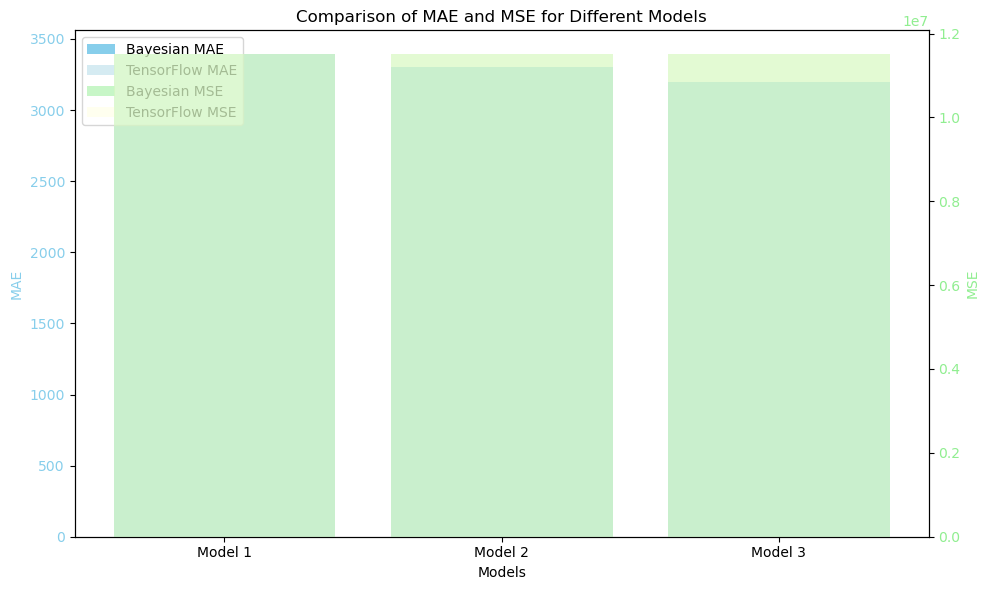

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample MAE and MSE values for Bayesian and TensorFlow models
bayesian_mae_values = [3391.303, 3300.0, 3200.0]  # Example values for Bayesian model
bayesian_mse_values = [11500942.032, 11500900.0, 11500000.0]  # Example values for Bayesian model

tf_mae_values = [3391.303, 3300.0, 3200.0]  # Example values for TensorFlow model
tf_mse_values = [11500942.032, 11500000.0, 11500900.0]  # Example values for TensorFlow model

# Model names
models = ['Model 1', 'Model 2', 'Model 3']  # Example model names, replace with actual model names

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Bayesian MAE on primary y-axis
color1 = 'skyblue'
ax1.set_xlabel('Models')
ax1.set_ylabel('MAE', color=color1)
ax1.bar(models, bayesian_mae_values, color=color1, label='Bayesian MAE')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a secondary y-axis for Bayesian MSE
ax2 = ax1.twinx()
color2 = 'lightgreen'
ax2.set_ylabel('MSE', color=color2)
ax2.bar(models, bayesian_mse_values, color=color2, alpha=0.5, label='Bayesian MSE')
ax2.tick_params(axis='y', labelcolor=color2)

# Plot TensorFlow MAE on primary y-axis
ax1.bar(models, tf_mae_values, color='lightblue', label='TensorFlow MAE', alpha=0.5)

# Plot TensorFlow MSE on secondary y-axis
ax2.bar(models, tf_mse_values, color='lightyellow', alpha=0.5, label='TensorFlow MSE')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adding title
ax1.set_title('Comparison of MAE and MSE for Different Models')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
